In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#generating two features X1 and X2 with mean 0 and standart deviation 1 (random data)
mu = 0
sigma = 1
X1 = np.random.normal(mu, sigma, size=1000)
X2 = np.random.normal(mu, sigma, size=1000)

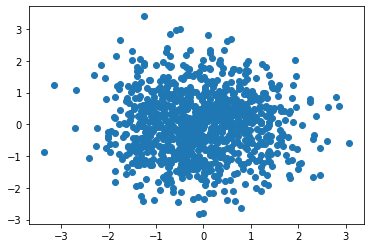

In [3]:
#visualizing data points
plt.scatter(X1, X2)

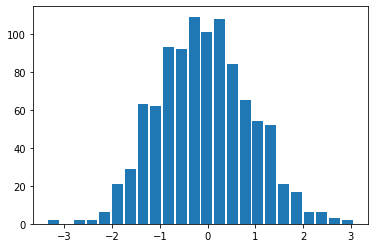

In [4]:
#visualizing histogram of X1 (which will be gaussian)
n, bins, patches = plt.hist(x=X1, bins='auto', rwidth=0.85)

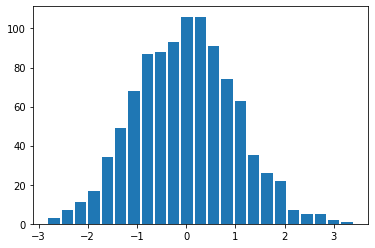

In [5]:
#visualizing histogram of X2 (which will be gaussian)
n, bins, patches = plt.hist(x=X2, bins='auto', rwidth=0.85)

In [6]:
#simple helper function to calculate gaussian probability density and multiplication of that as single vector
import scipy.stats

def gaussian_probability_density(features):
    P_x = scipy.stats.norm(loc=0, scale=1).pdf(features[0])
    for i in range(1,len(features)):
        pdf = scipy.stats.norm(loc=0, scale=1).pdf(features[i])
        P_x = np.multiply(P_x, pdf)
        
    return P_x

In [7]:
#getting P(x) for features X1 and X2
P_x = gaussian_probability_density([X1, X2])

In [8]:
#epsilon is the threshold which we have to decide so in this case we are taking minimum of P(x)
epsilon = min(P_x)

In [9]:
#predicting on new data point (X1,X2)=(1,1) and detecting if it is anomaly or not
P_x_pred = gaussian_probability_density([[1], [1]])

if P_x_pred < epsilon:
    print("Anomaly")
else:
    print("Normal")

Normal


In [10]:
#predicting on new data point (X1,X2)=(5,5) and detecting if it is anomaly or not
P_x_pred = gaussian_probability_density([[5], [5]])

if P_x_pred < epsilon:
    print("Anomaly")
else:
    print("Normal")

Anomaly


In [11]:
#generating random test data
test_data = []
for i in range(-7, 7):
    for j in range(-7, 7):
        test_data.append([[i], [j]])
        
print(test_data[0:5])

[[[-7], [-7]], [[-7], [-6]], [[-7], [-5]], [[-7], [-4]], [[-7], [-3]]]


In [12]:
#generating prediction of each test point and appending in y_pred list
y_pred = []
for td in test_data:
    P_x_pred = gaussian_probability_density(td)
    
    if P_x_pred < epsilon:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
print(y_pred[0:5])

[1, 1, 1, 1, 1]


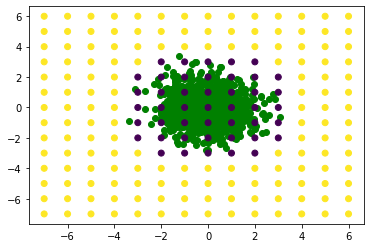

In [13]:
#visualizing anomaly
plt.scatter(X1, X2, color="green")
plt.scatter([i[0][0] for i in test_data], [i[1][0] for i in test_data], c=y_pred)

In [14]:
#All yellow points are detected as Anomaly